# Proyecto 3

**Tema:** Resultados Saber 11


|     Nombres      |      Apellidos       |     Login     |  Codigo   |
| :--------------: | :------------------: | :-----------: | :-------: |
|     Santiago     | Gonzalez Montealegre | s.gonzalez35  | 202012274 |
| Juliana Carolina |  Cardenas Barragan   | jc.cardenasb1 | 202011683 |


## Medidas de Desempeño - Estructura - Puntajes - BIC

## K-Fold Cross Validation

## Librerías Requeridas

In [1]:
import pandas as pd
from pgmpy.estimators import HillClimbSearch
from pgmpy.estimators import BicScore
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import MaximumLikelihoodEstimator
from pgmpy.inference import VariableElimination
from sklearn.model_selection import KFold
import matplotlib.pyplot as plt

## Carga de Datos

In [3]:
df = pd.read_csv("../../Data/Transformed/Discrete.csv")

In [4]:
df.head()

,colegio_rural,colegio_bilingue,colegio_calendario,colegio_privado,colegio_genero,colegio_jornada,estudiante_genero,familia_estrato,madre_educacion,padre_educacion,computador,internet,puntaje,colegio_mcpio_distinto,presentacion_mcpio_distinto
0,0,0,1,0,1,2,0,1,4,2,1,1,5,0,0
1,0,0,1,0,1,2,0,1,3,3,0,0,4,0,1
2,0,0,1,0,1,2,0,1,3,3,0,0,4,0,1
3,1,0,1,1,2,5,0,4,9,10,1,1,7,0,0
4,0,0,1,0,1,2,0,1,2,2,1,1,5,0,0


In [5]:
df = pd.read_csv("../../Data/Transformed/Clean.csv")

In [6]:
df.head()

,cole_area_ubicacion,cole_bilingue,cole_calendario,cole_naturaleza,cole_genero,cole_jornada,cole_cod_depto_ubicacion,cole_cod_mcpio_ubicacion,estu_cod_depto_presentacion,estu_cod_mcpio_presentacion,estu_cod_reside_depto,estu_cod_reside_mcpio,estu_genero,fami_estratovivienda,fami_educacionmadre,fami_educacionpadre,fami_personashogar,fami_tienecomputador,fami_tieneinternet,punt_global
0,URBANO,N,A,OFICIAL,MIXTO,MAÑANA,13,13001,13,13001,13,13001,F,Estrato 1,Secundaria (Bachillerato) incompleta,Primaria incompleta,Siete,Si,Si,205
1,URBANO,N,A,OFICIAL,MIXTO,MAÑANA,70,70523,70,70001,70,70523,F,Estrato 1,Primaria completa,Primaria completa,5 a 6,No,No,187
2,URBANO,N,A,OFICIAL,MIXTO,MAÑANA,70,70523,70,70001,70,70523,F,Estrato 1,Primaria completa,Primaria completa,5 a 6,No,No,187
3,RURAL,N,A,NO OFICIAL,MASCULINO,COMPLETA,11,11001,11,11001,11,11001,F,Estrato 4,Educación profesional completa,Postgrado,Cuatro,Si,Si,313
4,URBANO,N,A,OFICIAL,MIXTO,MAÑANA,25,25899,25,25899,25,25899,F,Estrato 1,Primaria incompleta,Primaria incompleta,7 a 8,Si,Si,201


In [7]:
df[['estu_cod_depto_presentacion', 'punt_global']]

,estu_cod_depto_presentacion,punt_global
0,13,205
1,70,187
2,70,187
3,11,313
4,25,201
...,...,...
3295960,52,289
3295961,52,208
3295962,52,208
3295963,76,235


In [29]:
df['estu_cod_depto_presentacion'].unique()

array([13, 70, 11, 25, 18,  5, 52,  8, 50, 54, 76, 73, 20, 66, 19, 15, 27,
       41, 63, 68, 86, 47, 17, 23, 85, 44, 95, 94, 81, 88, 97, 91, 99],
      dtype=int64)

<AxesSubplot: >

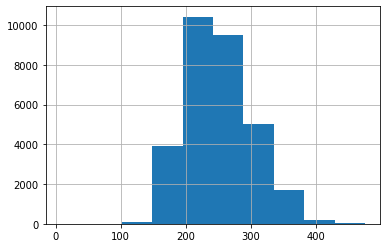

In [28]:
df[df['estu_cod_mcpio_presentacion'] == 70001]['punt_global'].hist()

<AxesSubplot: >

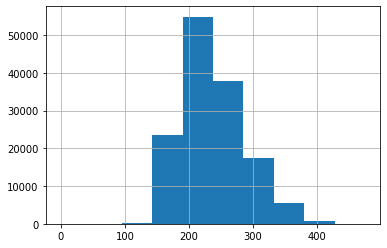

In [15]:
df[df['estu_cod_depto_presentacion'] == 13]['punt_global'].hist()

<AxesSubplot: >

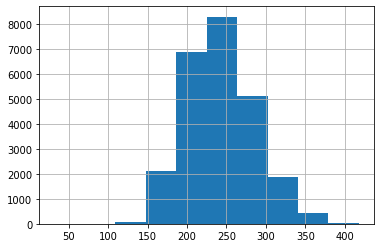

In [20]:
df[df['estu_cod_depto_presentacion'] == 18]['punt_global'].hist()

<AxesSubplot: >

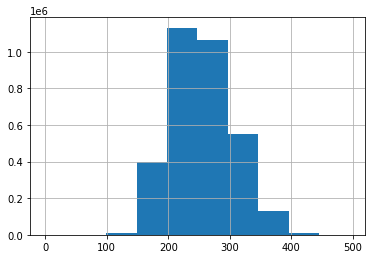

In [17]:
df['punt_global'].hist()

In [32]:
mean = df.groupby('estu_cod_depto_presentacion').agg(punt_mean = ('punt_global', 'mean'))
mean.reset_index()

,estu_cod_depto_presentacion,punt_mean
0,5,251.500213
1,8,250.144007
2,11,275.544473
3,13,236.689588
4,15,264.459057
5,17,253.950400
6,18,242.518967
7,19,241.675472
8,20,244.805016
9,23,244.131661


In [ ]:
departamentos